# 0.0 IMPORTS


In [2]:
import os
import pandas as pd
import inflection
import math
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import Image

## 0.1 Helper Functions

## 0.2 Diretorios

In [3]:
BASE_DIR = os.path.abspath('')   
DATA_DIR = os.path.join(BASE_DIR,'data')

## 0.3 Loading Data

In [4]:
df_sales_raw = pd.read_csv(os.path.join(DATA_DIR,'train.csv'), low_memory = False)
df_store_raw = pd.read_csv(os.path.join(DATA_DIR,'store.csv'), low_memory = False)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

df_raw_train, df_raw_tv = train_test_split(df_raw, random_state=43, train_size=0.8)

df_raw_tv = df_raw_tv.reset_index(drop=True); df_raw_train = df_raw_train.reset_index(drop=True)


# 1.0 Data Discription

In [5]:
df1_train = df_raw_train.copy()

## 1.1 Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
            'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

#rename
df1_train.columns = cols_new

## 1.2 Data Dimensions

In [7]:
print('Number of Rows: {}'.format(df1_train.shape[0]))
print('Number of Columns: {}'.format(df1_train.shape[1]))

Number of Rows: 813767
Number of Columns: 18


## 1.3 Data Types

In [8]:
df1_train['date'] = pd.to_datetime(df1_train['date'])
df1_train.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [9]:
df1_train.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2066
competition_open_since_month    258531
competition_open_since_year     258531
promo2                               0
promo2_since_week               406197
promo2_since_year               406197
promo_interval                  406197
dtype: int64

## 1.4 Fillout NA

In [10]:
#MUITO LENTO

##competition_distance              2066
#df1_train['competition_distance'] = [200000.0 if math.isnan(i) else i for i in df1_train['competition_distance']]
#
##competition_open_since_month    258531
#df1_train['competition_open_since_month'] = [ x['date'].month if math.isnan(x['competition_open_since_month']) 
                                                              #else x['competition_open_since_month'] for _, x in df1_train.iterrows() ]
#
##competition_open_since_year     258531
#df1_train['competition_open_since_year'] = [ x['date'].month if math.isnan(x['competition_open_since_year']) 
                                                             #else x['competition_open_since_year'] for _, x in df1_train.iterrows() ]
#
##promo2_since_week               406197
#df1_train['promo2_since_week'] = [x['date'].week if math.isnan(x['promo2_since_week']) 
                                                 #else x['promo2_since_week'] for _, x in df1_train.iterrows()]
#
##promo2_since_year               406197
#df1_train['promo2_since_year'] = [x['date'].year if math.isnan(x['promo2_since_year']) 
                                                 #else x['promo2_since_year'] for _, x in df1_train.iterrows()]
#
##promo_interval                  406197
#month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
#
#df1_train['promo_interval'].fillna(0, inplace = True)
#
#df1_train['month_map'] = df1_train['date'].dt.month.map(month_map)
#
#df1_train['is_promo'] = [0 if x['promo_interval'] == 0 
                           #else 1 if x['month_map'] in x['promo_interval'].split(',') 
                           #else 0 for _, x in df1_train[['promo_interval', 'month_map']].iterrows()]





In [11]:

# competition_distance
df1_train['competition_distance'].fillna(200000.0, inplace=True)

# competition_open_since_month
df1_train['competition_open_since_month'] = df1_train.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year
df1_train['competition_open_since_year'] = df1_train.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week
df1_train['promo2_since_week'] = df1_train.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year
df1_train['promo2_since_year'] = df1_train.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1_train['promo_interval'].fillna(0, inplace=True)
df1_train['month_map'] = df1_train['date'].dt.month.map(month_map)

def is_promo(row):
    if row['promo_interval'] == 0:
        return 0
    elif row['month_map'] in row['promo_interval'].split(','):
        return 1
    else:
        return 0

df1_train['is_promo'] = df1_train.apply(is_promo, axis=1)

## 1.6 Change Types (again)

In [12]:
df1_train['competition_open_since_month'] = df1_train['competition_open_since_month'].astype(int)
df1_train['competition_open_since_year'] = df1_train['competition_open_since_year'].astype(int)
df1_train['promo2_since_week'] = df1_train['promo2_since_week'].astype(int)
df1_train['promo2_since_year'] = df1_train['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistical

In [13]:
num_attributes = df1_train.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1_train.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

<Axes: xlabel='competition_open_since_year', ylabel='Density'>

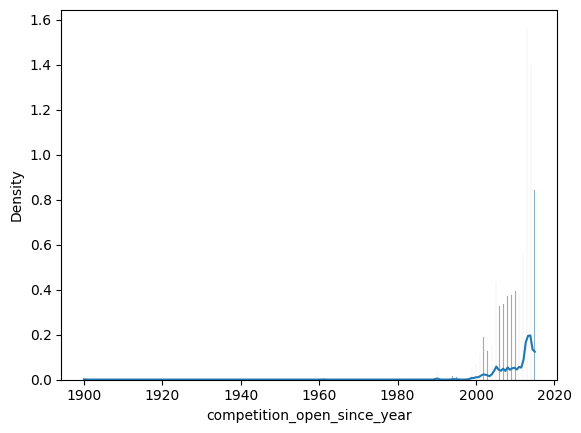

In [14]:
#Central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

m.columns = (['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

sns.histplot(df1_train['competition_open_since_year'], kde=True, stat="density")
#plt.ylim([0,0.0025]); plt.xlim([0,3000])


<Axes: xlabel='assortment', ylabel='sales'>

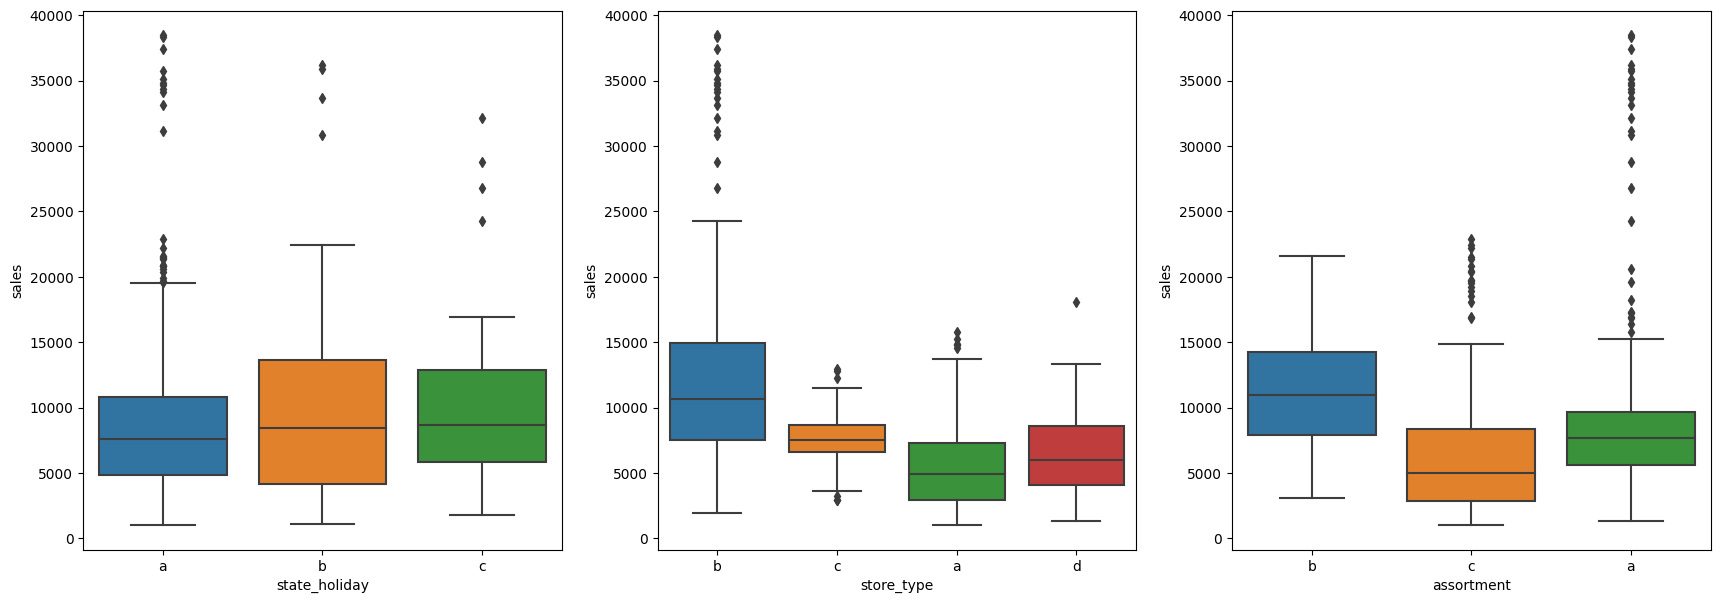

In [15]:
cat_attributes.apply(lambda x: x.unique().shape[0])

aux1 = df1_train[(df1_train['state_holiday'] != '0') & (df1_train['sales'] > 0)]

fig = plt.subplots(1, 3, figsize=(21, 7))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 FEATURE ENGINEERING

## 2.1 Mapa mental das hipoteses

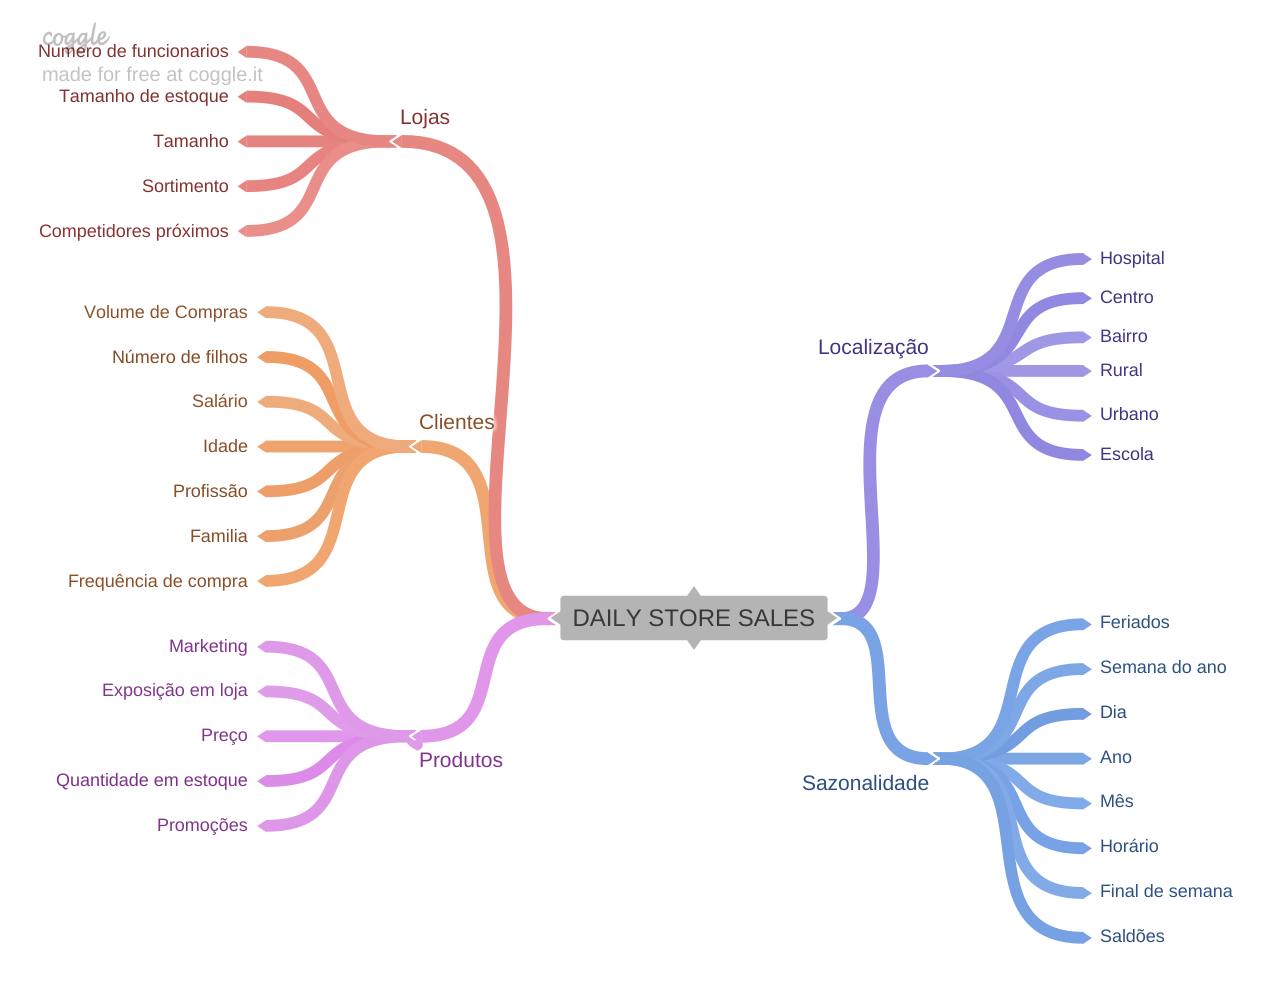

In [16]:
Image('images/mind_map_hipoteses.png')

## 2.2 Criação das hipoteses


## hipoteses  loja

**1.** Lojas com maior quadro de funcionarios deveriam vender mais;

**2.** Lojas com maior estoque deveriam vender mais;

**3.** Lojas com maior porte deveriam vender mais;

**4.** Lojas com menor porte deveriam vender menos;

**5.** Lojas com maior sortimento deveriam vender mais;

**6.** Lojas com competidores mais próximos deveriam vender menos;

**7.** Lojas com competidores à mais tempo deveriam vender mais.

## hipoteses do produto

**1.** Lojas que investem mais em marketing deveriam vender mais;

**2.** Lojas que expoem mais os produtos na vitrine deveriam vender mais;

**3.** Lojas que tem preços menores nos produtos deveriam vender mais;

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções mais agressivais deveriam vender mais;

**6.** Lojas com mais dias de promoção deveriam vender mais;

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

## hipoteses de tempo

**1.** Lojas que abrem durante o natal deveriam vender mais;

**2.** Lojas deveriam vender mais ao longo dos anos;

**3.** Lojas deveriam vender mais no segundo semestre do ano;

**4.** Lojas deveria vender mais após o dia 10 de cada mês;

**5.** Lojas deveriam vender menos aos finais de semana;

**6.** Lojas deveriam vender menos durante feriados escolares;

## Lista final de hipoteses

**1.** Lojas com maior sortimento deveriam vender mais;

**2.** Lojas com competidores mais próximos deveriam vender menos;

**3.** Lojas com competidores à mais tempo deveriam vender mais.

--------------------------------------------------------------------------------

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais;

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

--------------------------------------------------------------------------------

**7.** Lojas que abrem durante o natal deveriam vender mais;

**8.** Lojas deveriam vender mais ao longo dos anos;

**9.** Lojas deveriam vender mais no segundo semestre do ano;

**10.** Lojas deveria vender mais após o dia 10 de cada mês;

**11.** Lojas deveriam vender menos aos finais de semana;

**12.** Lojas deveriam vender menos durante feriados escolares;

In [17]:
df2_train = df1_train.copy()

## 2.3 Feature Engineering

In [18]:
#Year
df2_train['year'] = df2_train['date'].dt.year

#Month
df2_train['month'] = df2_train['date'].dt.month

#Day
df2_train['day'] = df2_train['date'].dt.day

#Week of Year
df2_train['week_of_year'] = df2_train['date'].dt.isocalendar().week

#Year week
df2_train['year_week'] = df2_train['date'].dt.strftime('%Y-%W')


#competition since
df2_train['competition_since'] = df2_train.apply(lambda x: datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1),axis=1)
df2_train['competition_time_month'] = ((df2_train['date']-df2_train['competition_since'])/30).apply(lambda x: x.days).astype(int)

#Promo since
df2_train['promo_since'] = df2_train['promo2_since_year'].astype(str)+'-'+df2_train['promo2_since_week'].astype(str)
df2_train['promo_since'] = df2_train['promo_since'].apply(lambda x: datetime.strptime(x+'-1','%Y-%W-%w')-timedelta(days=7))
df2_train['promo_time_week'] = ((df2_train['date']-df2_train['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment
df2_train['assortment'] = df2_train['assortment'].apply(lambda x: 'basic' if x=='a' else 'extra' if x=='b' else 'extended')

#state holiday
df2_train['state_holiday'] = df2_train['state_holiday'].apply(lambda x: 'public_holiday' if x=='a' else 'easter_holiday' if x=='b' else 'christmas' if x == 'c' else 'regular_day')

# 3.0 FILTRAGEM DE VARIAVEIS

In [26]:
df3_train = df2_train.copy()

## Filtragem das linhas

In [27]:
df3_train = df3_train[df3_train['open'] != 0]
df3_train = df3_train[df3_train['sales'] > 0]

## Seleção das colunas

In [28]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3_train = df3_train.drop(cols_drop, axis=1)